# Some useful functions

In [3]:
from __future__ import print_function
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

import sys
#sys.path.append("C:/Users/user/Desktop/ipynb/misshapen/")
sys.path.append("C:/Users/Yimeng/Documents/GitHub/")
import misshapen
from misshapen import nonshape


In [4]:
import util
import imp
imp.reload(util)

<module 'util' from 'C:\\Users\\Yimeng\\Documents\\GitHub\\LabWork\\util.py'>

In [5]:
data_paths, all_regions = util.load_paths()

In [6]:
data_paths['bp']['1']

['C:/data2/dg//bp/1\\12.npy', 'C:/data2/dg//bp/1\\6.npy']

# Load behavior data

In [7]:
df = pd.read_csv('behavior_all.csv',index_col=0)

In [8]:
df.head()

cue_end  cue_start  delay_end  delay_start  duration  finger  move_end  \
0     9079       7079      680.0       1160.0    1520.0     5.0    9759.0   
1    13079      11079      640.0        840.0    1800.0     5.0   13719.0   
2    17079      15079      400.0        720.0    1680.0     5.0   17479.0   
3    21079      19079      600.0        800.0    1800.0     1.0   21679.0   
4    25079      23079      560.0        880.0    1680.0     5.0   25639.0   

   move_start subject  
0      8239.0      bp  
1     11919.0      bp  
2     15799.0      bp  
3     19879.0      bp  
4     23959.0      bp

In [9]:
# Only look at behavior for one subj
subj = 'bp'
dfbp = df[df['subject']=='bp']
#dfbp[(dfbp['delay_start']<2000) & (dfbp['delay_end']<1500)]

In [30]:
x = np.load(data_paths['bp']['1'][0])

# Define time series (Fs = 1000Hz)
Fs = 1000.
N_samples = len(x)


t_max = N_samples/float(Fs)
t = np.arange(0,t_max,1/float(Fs))

In [11]:
# IMPORTANT FILTERING
# High-pass filter at .5 Hz, Ntaps=2000
# Low-pass at 200Hz, Ntaps=500
# Notch at 60, 120, 180

(11.5, 14.5)

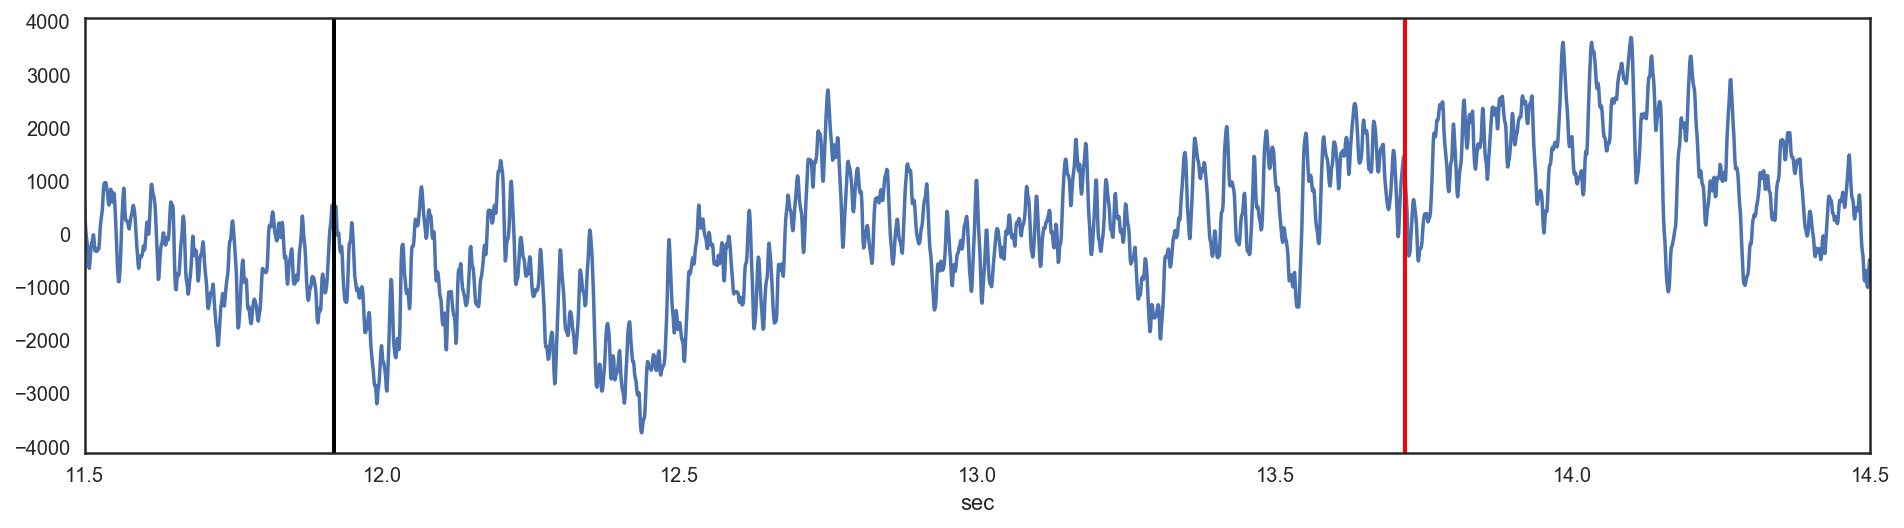

In [31]:
# Define samples of interest
trange = (11.5,14.5)
samps = np.argwhere(np.logical_and(t >= trange[0], t < trange[1]))
plt.figure(figsize=(16,4))
plt.plot(t[samps], x[samps])
plt.xlabel('sec')
for i,j in zip(dfbp['move_start'],dfbp['move_end']):
    plt.axvline(x=i/float(Fs), ymin=0, ymax = 3000, linewidth=2, color='k')
    plt.axvline(x=j/float(Fs), ymin=0, ymax = 3000, linewidth=2, color='r')
plt.xlim(11.5,14.5)

In [13]:
# Calculate PSD
x_nonoise = nonshape.notch_default(x, 60, 2, Fs)
f, psd = nonshape.f_psd(x, Fs, 'welch',welch_params={'nperseg': 10000})
f, psd2 = nonshape.f_psd(x_nonoise, Fs, 'welch',welch_params={'nperseg': 10000})
#f2, psd2 = nonshape.f_psd(ecog[1], Fs, 'welch',welch_params={'nperseg': 10000, 'window': 'hanning', 'noverlap': None})

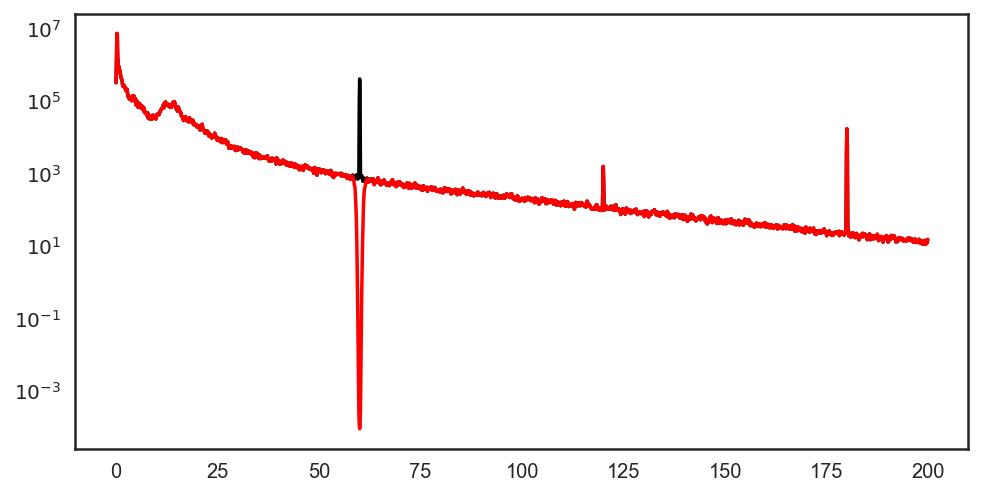

In [14]:
# Plot psd
flim = (0,200)
plt.figure(figsize=(8,4))
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd[np.logical_and(f>=flim[0],f<flim[1])],'k')
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd2[np.logical_and(f>=flim[0],f<flim[1])],'r')

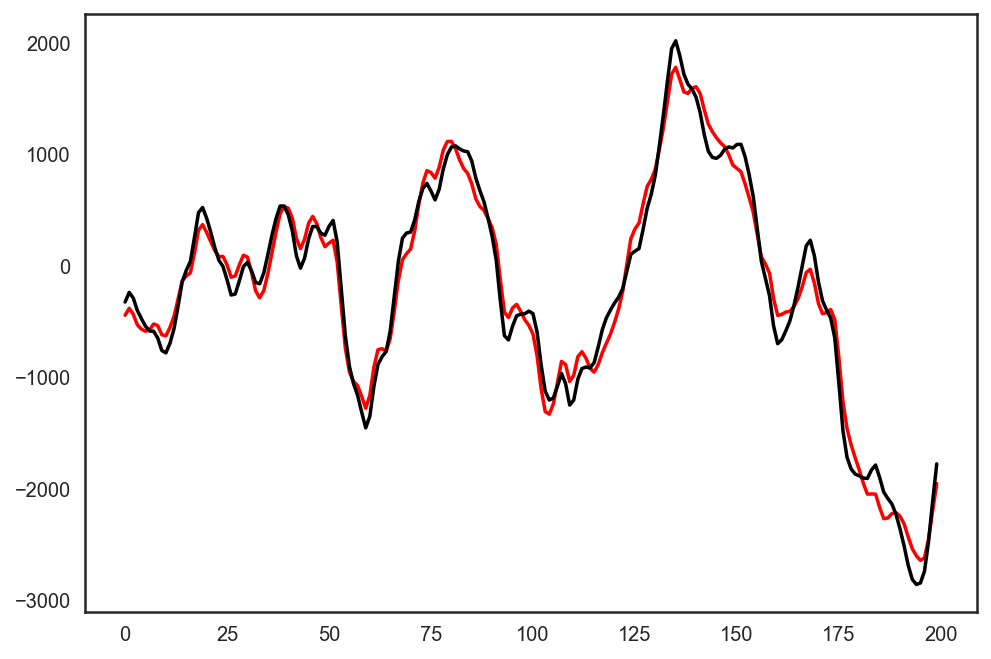

In [15]:
x_nonoise = nonshape.notch_default(x, 60, 2, Fs)
plt.plot(x_nonoise[:200],'r')
plt.plot(x[:200],'k')

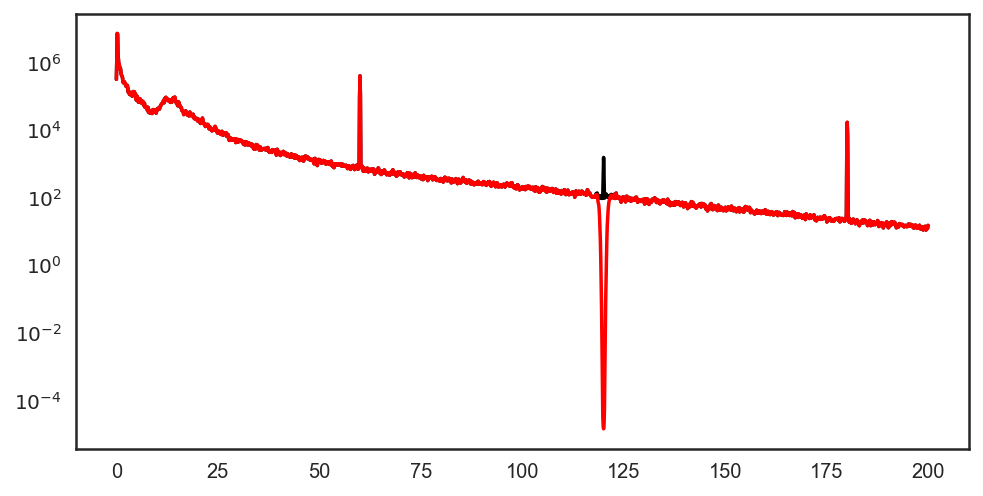

In [16]:
#120
x_notch120=nonshape.notch_default(x,120,2,Fs)
f, psd = nonshape.f_psd(x, Fs, 'welch',welch_params={'nperseg': 10000})
f, psd2 = nonshape.f_psd(x_notch120, Fs, 'welch',welch_params={'nperseg': 10000})
flim = (0,200)
plt.figure(figsize=(8,4))
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd[np.logical_and(f>=flim[0],f<flim[1])],'k')
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd2[np.logical_and(f>=flim[0],f<flim[1])],'r')

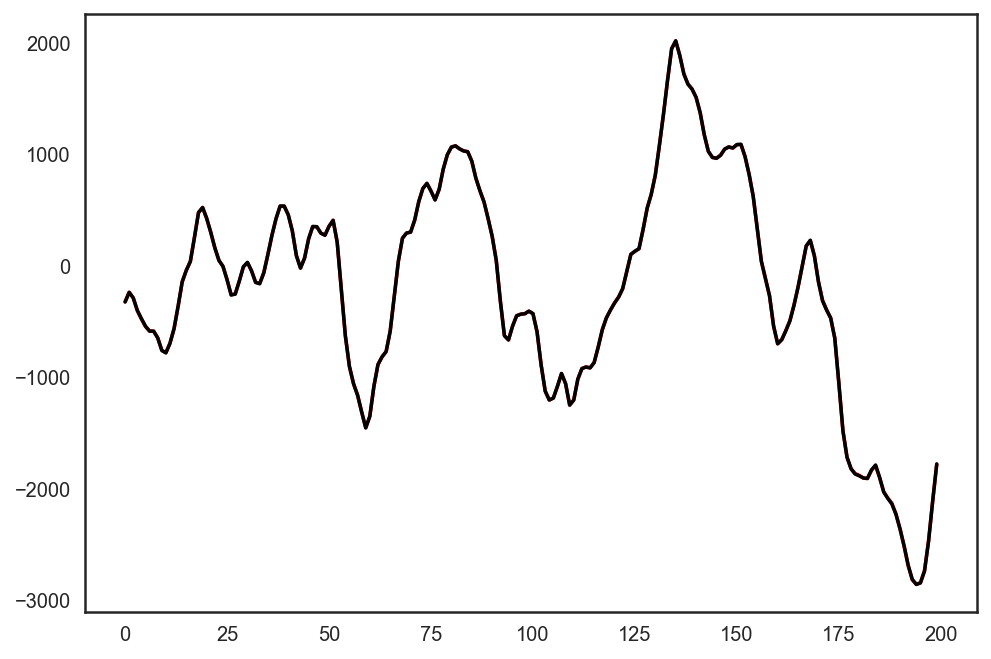

In [17]:
plt.plot(x_notch120[:200],'r')
plt.plot(x[:200],'k')

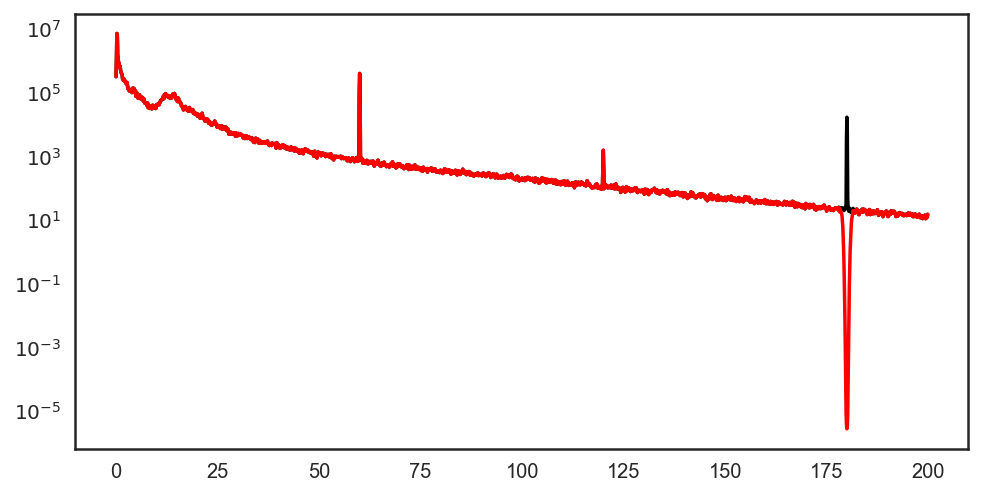

In [18]:
x_notch180=nonshape.notch_default(x,180,2,Fs)
f, psd = nonshape.f_psd(x, Fs, 'welch',welch_params={'nperseg': 10000})
f, psd2 = nonshape.f_psd(x_notch180, Fs, 'welch',welch_params={'nperseg': 10000})
flim = (0,200)
plt.figure(figsize=(8,4))
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd[np.logical_and(f>=flim[0],f<flim[1])],'k')
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd2[np.logical_and(f>=flim[0],f<flim[1])],'r')

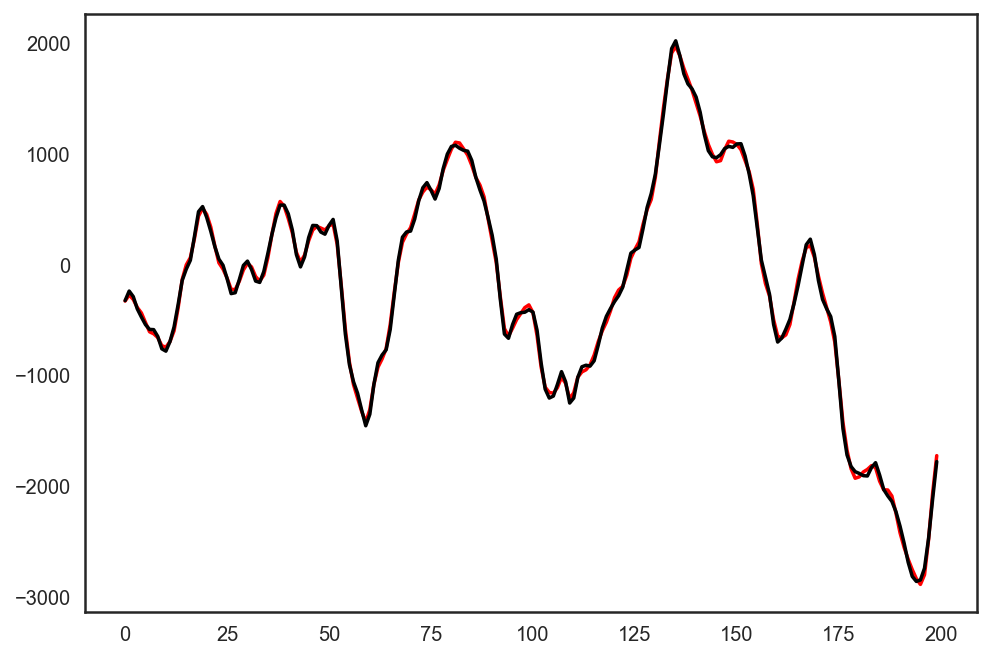

In [19]:
plt.plot(x_notch180[:200],'r')
plt.plot(x[:200],'k')

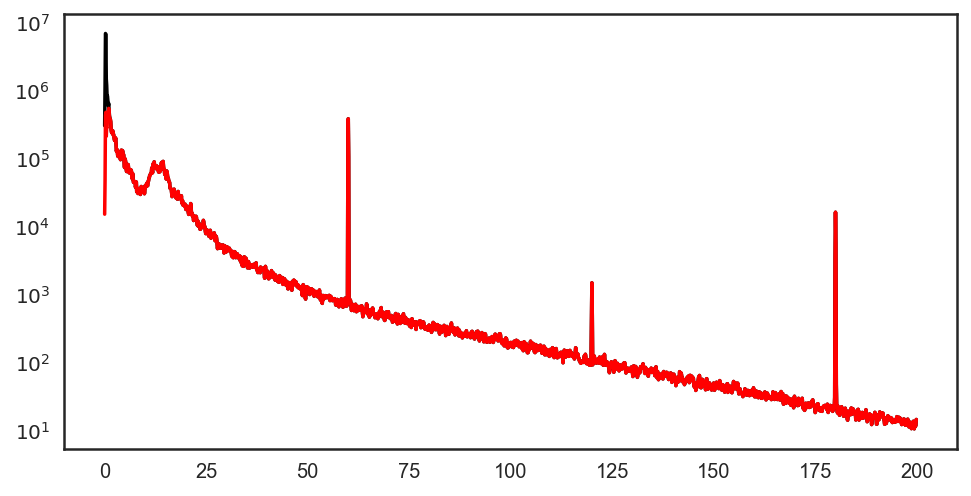

In [20]:
x_highpass=nonshape.highpass_default(x,Fs,0.5,2001)
f, psd = nonshape.f_psd(x, Fs, 'welch',welch_params={'nperseg': 10000})
f, psd2 = nonshape.f_psd(x_highpass, Fs, 'welch',welch_params={'nperseg': 10000})
flim = (0,200)
plt.figure(figsize=(8,4))
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd[np.logical_and(f>=flim[0],f<flim[1])],'k')
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd2[np.logical_and(f>=flim[0],f<flim[1])],'r')

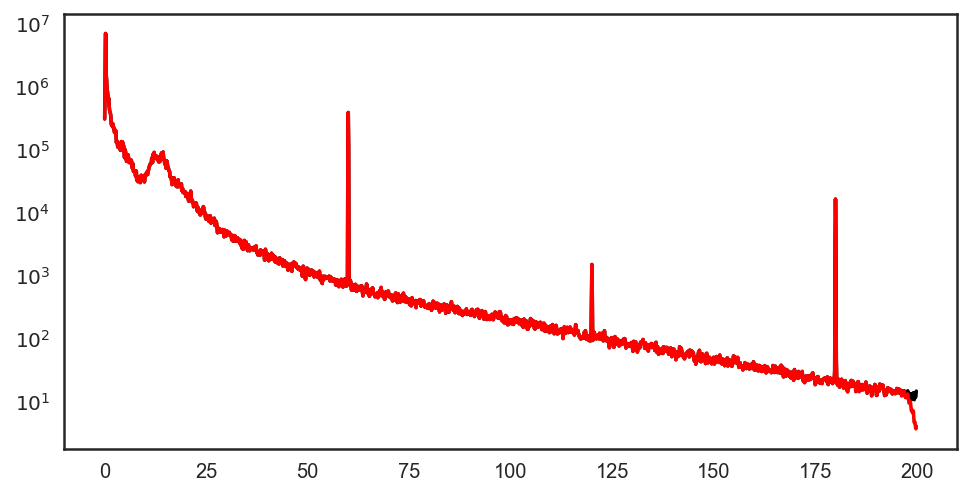

In [21]:
x_lowpass=nonshape.lowpass_default(x,Fs,200,500)
f, psd = nonshape.f_psd(x, Fs, 'welch',welch_params={'nperseg': 10000})
f, psd2 = nonshape.f_psd(x_lowpass, Fs, 'welch',welch_params={'nperseg': 10000})
flim = (0,200)
plt.figure(figsize=(8,4))
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd[np.logical_and(f>=flim[0],f<flim[1])],'k')
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd2[np.logical_and(f>=flim[0],f<flim[1])],'r')

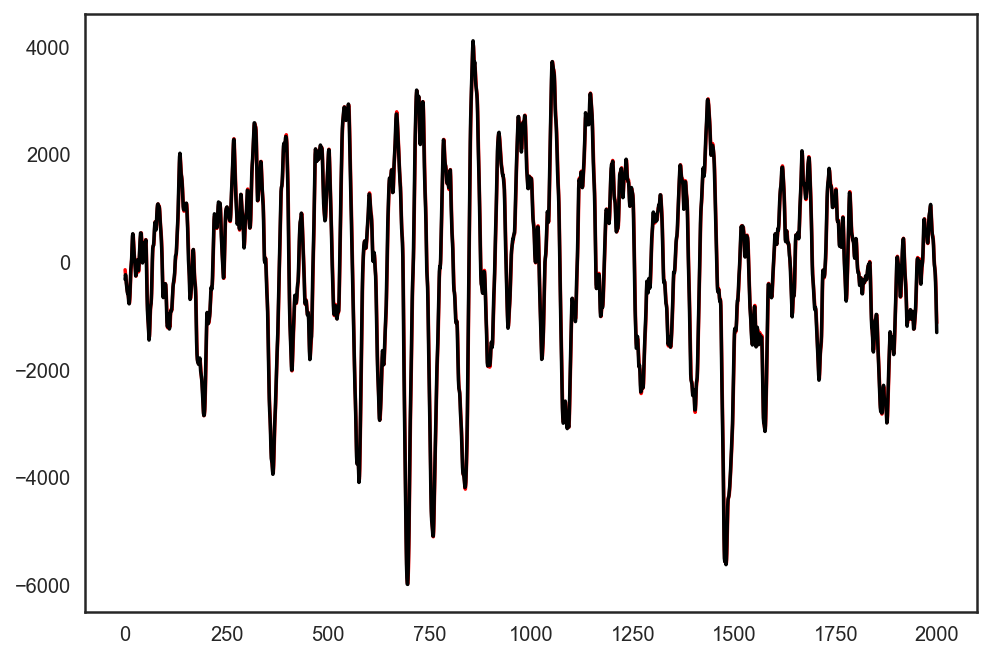

In [22]:
plt.plot(x_lowpass[:2000],'r')
plt.plot(x[:2000],'k')

(0, 25)

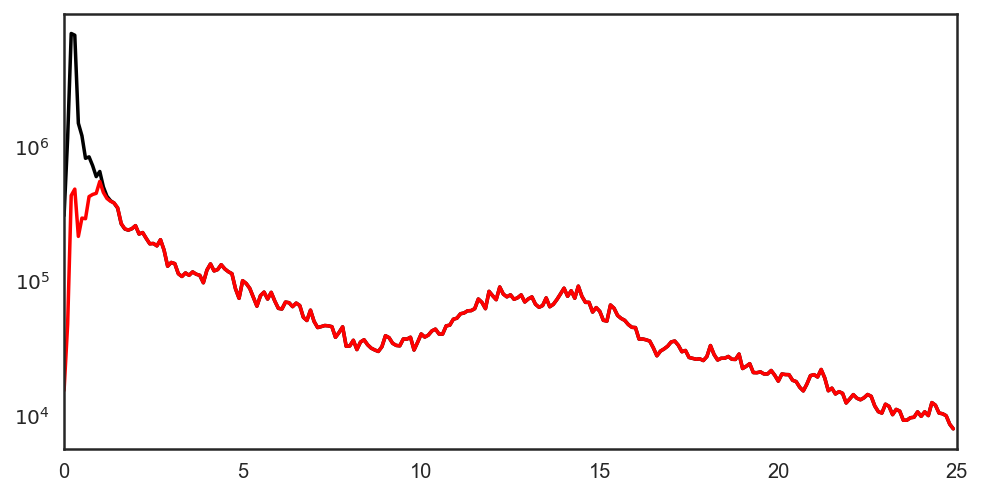

In [47]:
x_nonoise = nonshape.notch_default(x, 60, 2, Fs)
x_nonoise1=nonshape.notch_default(x_nonoise,120,2,Fs)
x_nonoise2=nonshape.notch_default(x_nonoise1,180,2,Fs)

x_nonoise3=nonshape.lowpass_default(x_nonoise2,Fs,200,500)
x_nonoise4=nonshape.highpass_default(x_nonoise3,Fs,0.5,2001)

f, psd = nonshape.f_psd(x, Fs, 'welch',welch_params={'nperseg': 10000})
f, psd2 = nonshape.f_psd(x_nonoise4, Fs, 'welch',welch_params={'nperseg': 10000})
flim = (0,25)
plt.figure(figsize=(8,4))
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd[np.logical_and(f>=flim[0],f<flim[1])],'k')
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd2[np.logical_and(f>=flim[0],f<flim[1])],'r')


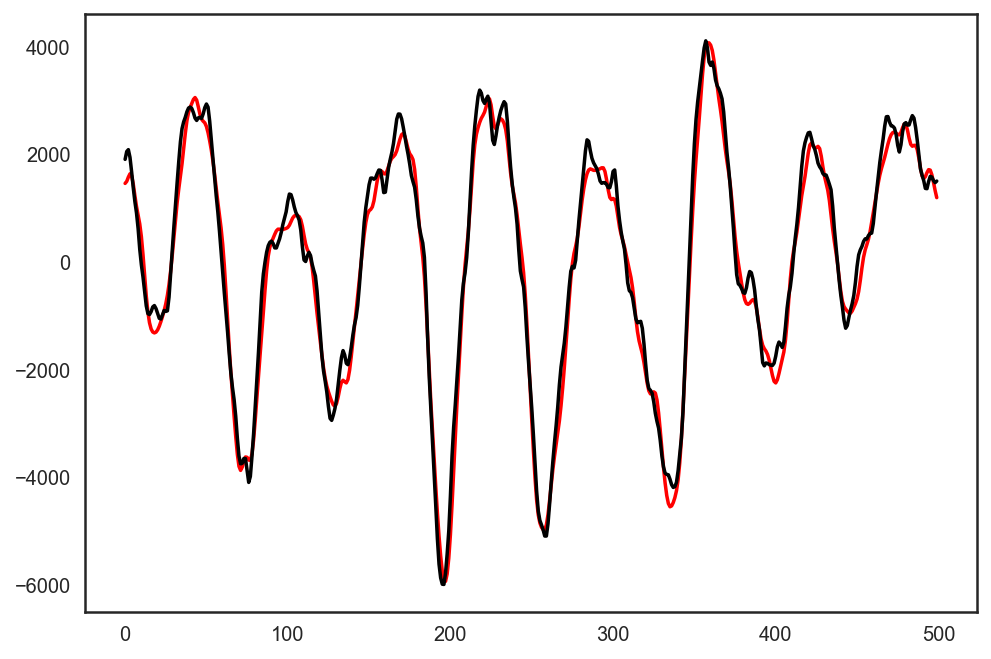

In [24]:
plt.plot(x_nonoise4[500:1000],'r')
plt.plot(x[500:1000],'k')

In [25]:
x_filt,_=nonshape.bandpass_default(x_nonoise4,(13,30),Fs,rmv_edge=False)

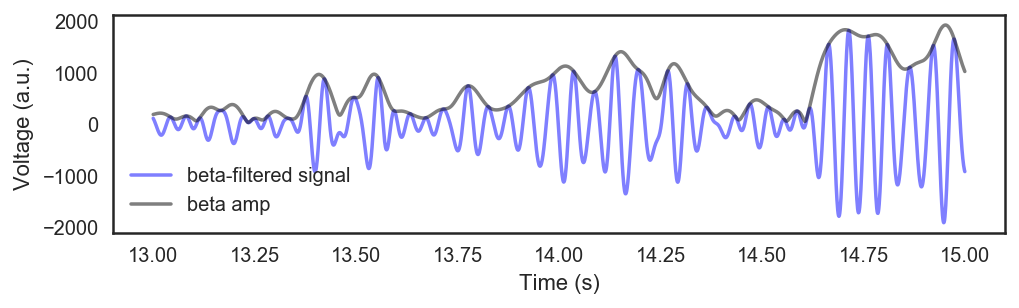

In [36]:
beta_amp = np.abs(sp.signal.hilbert(x_filt))

samp_plot = range(13000,15000)
plt.figure(figsize=(8,2))
plt.plot(t[samp_plot],x_filt[samp_plot],'b',label='beta-filtered signal',alpha=.5)
plt.plot(t[samp_plot],beta_amp[samp_plot],'k',label='beta amp',alpha=.5)
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (a.u.)')

In [27]:
trial_starts = dfbp['cue_start'].values
N_trials = len(trial_starts)
samps_window_lim = (-1000, 1000)
N_samps = samps_window_lim[1] - samps_window_lim[0]

beta_amps = np.zeros((N_trials,N_samps))
for i, t in enumerate(trial_starts):
    beta_amps[i] = beta_amp[t+samps_window_lim[0]:t+samps_window_lim[1]]

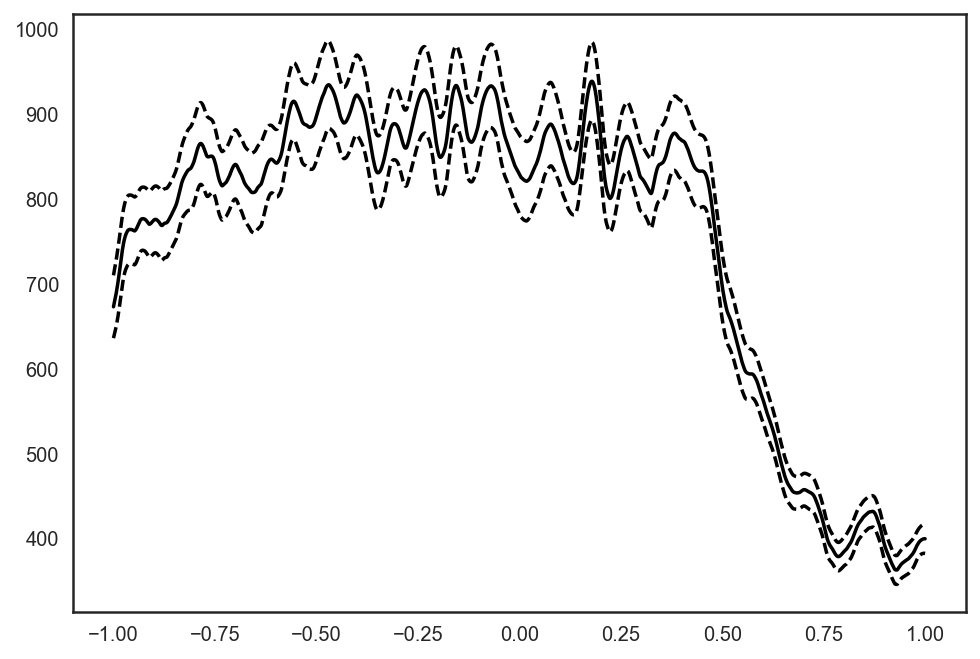

In [28]:
avg_beta_amp = np.mean(beta_amps,axis=0)
sem_beta_amp = sp.stats.sem(beta_amps,axis=0)

t = np.arange(samps_window_lim[0]/Fs,samps_window_lim[1]/Fs,1/Fs)
plt.plot(t,avg_beta_amp,'k-')
plt.plot(t,avg_beta_amp-sem_beta_amp,'k--')
plt.plot(t,avg_beta_amp+sem_beta_amp,'k--')

(15, 20)

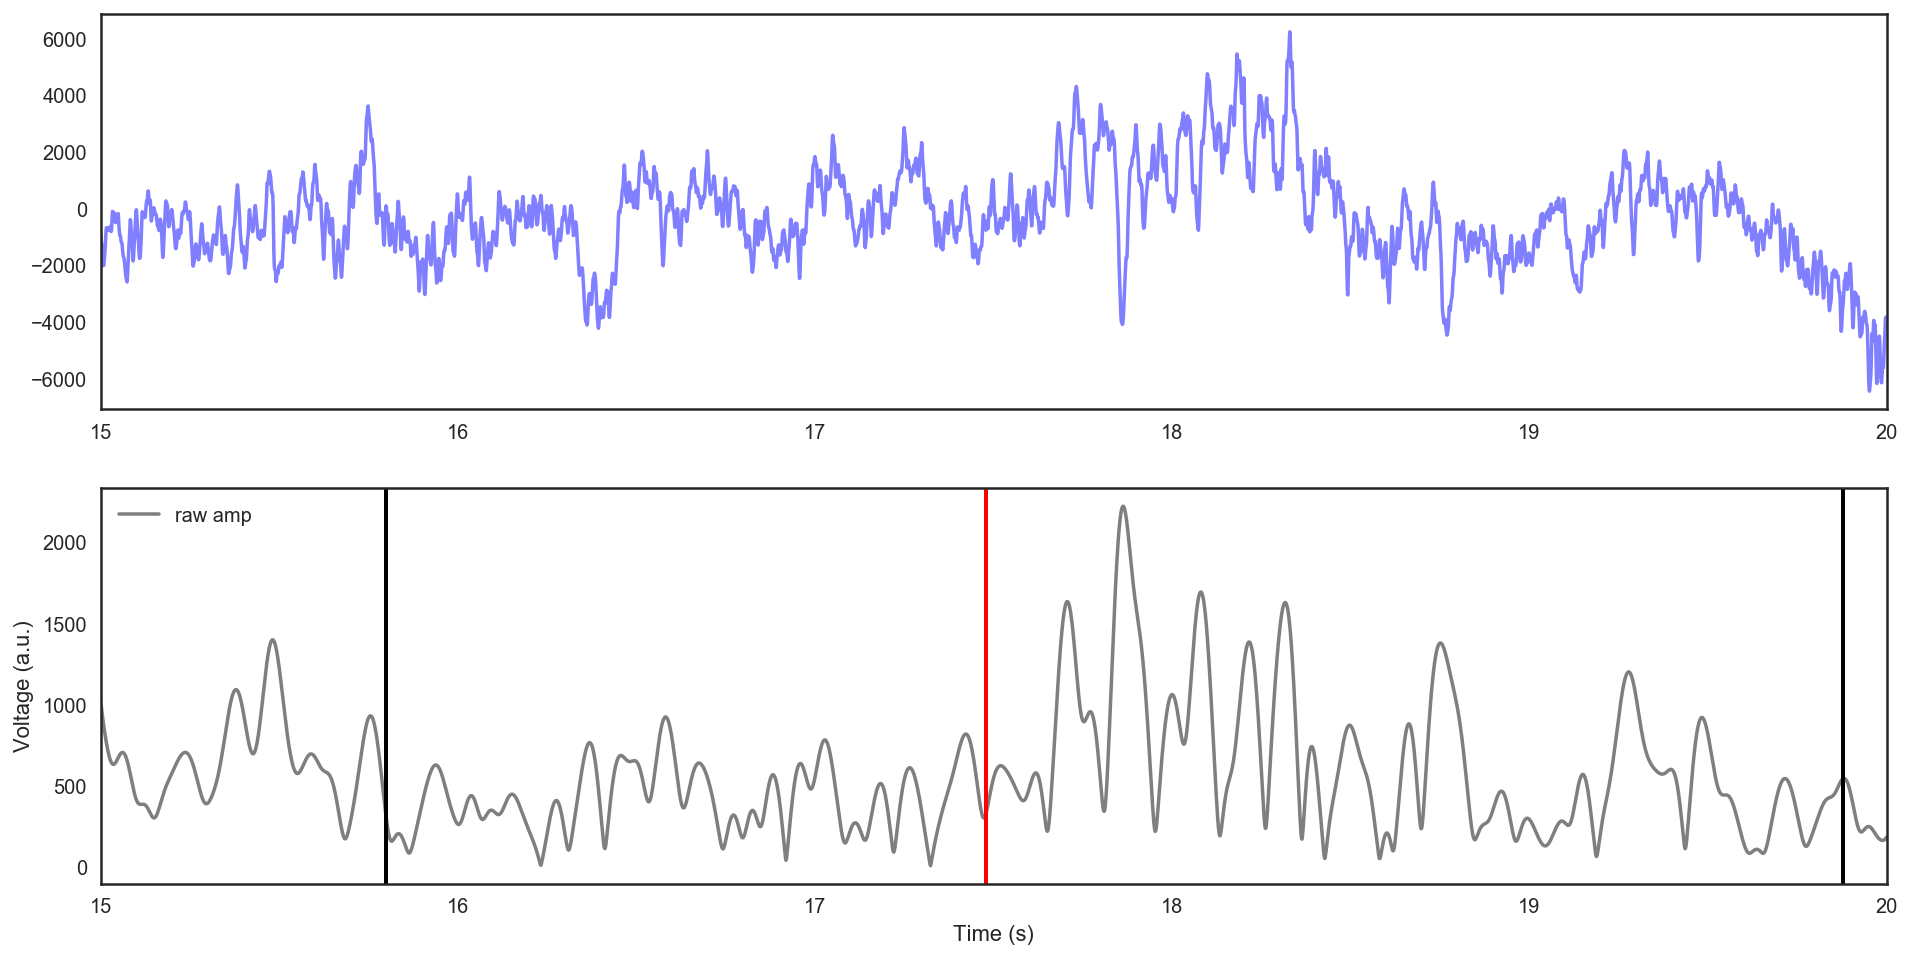

In [45]:
beta_amp = np.abs(sp.signal.hilbert(x_filt))

samp_plot = range(15000,20000)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.plot(t[samp_plot],x[samp_plot],'b',label='raw signal',alpha=.5)
plt.xlim(15,20)
plt.subplot(2,1,2)
plt.plot(t[samp_plot],beta_amp[samp_plot],'k',label='raw amp',alpha=.5)
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (a.u.)')
for i,j in zip(dfbp['move_start'],dfbp['move_end']):
    plt.axvline(x=i/float(Fs), ymin=0, ymax = 3000, linewidth=2, color='k')
    plt.axvline(x=j/float(Fs), ymin=0, ymax = 3000, linewidth=2, color='r')
plt.xlim(15,20)